In [1865]:
#import modules
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import math

In [1866]:
def run_md(N_atoms, r, T, m, size, num_steps, dump, dt):
    """
    MD program using velocity verlet algorithm
    N_atoms = number_of_atoms
    f = force_of_particles
    r = distance_between_particles
    T = Boltzmann_temperature
    m = mass_of_particle
    size = size_of_the_box
    num_steps = number_of_steps
    dump = frequency_in_steps
    dt = time_step
    """
    
    # initialize positions
    positions = initialize_positions(N_atoms, size)
    
    # initialize velocities
    velocities = initialize_velocities(m, kB, T)
    
    # Main MD loop
     # open trajectory file
    traj_file = open("traj_MD.xyz", 'w')
    for steps in range(num_steps):
    
        # Propagate Positions
        update_positions(positions, velocities, f, dt, size)
        
        # Propagate Velocities
        update_velocities(velocities, f, dt)
        
        if (step%dump==0):
            write_trajectory_frame(positions, traj_file, step)
    
        # close trajectory file
        traj_file.close()
        return traj_file

In [1867]:
#################Sub-Routines#################

# initialize positions
def initialize_positions(N_atoms, size):
    
    return np.random.rand(N_atoms, 2) * size

In [1868]:
positions = initialize_positions(2, 2)
print(positions)

[[0.89689104 0.58642154]
 [0.65732909 1.34503691]]


In [1869]:
def compute_forces(positions, f, size):
    """
    Compute forces
    epsilon = welldepth of the particles
    sigma = distance at which potential is zero
    r = distance between two particles
    """
    N = 2 
    size = 2
    r6 = (sigma / r) ** 6
    r12 = r6 ** 2
    f = -24 * epsilon * (2 * r12 - r6) / r
    return f

In [1870]:
epsilon = 1
sigma = 1
r = 2
r6 = (sigma / r) ** 6
r12 = r6 ** 2
f = -24 * epsilon * (2 * r12 - r6) / r
print(f)

0.181640625


In [1871]:
# initialize velocities
def initialize_velocities(m, kB, T):
    """
    kB = boltzmann_temp
    """
    velocities = np.random.normal(loc=0, scale=1, size=(N,2)) * np.sqrt(kB*T/m)
    return velocities

In [1872]:
kB = 0.08314
T = 300
m = 16
velocities = np.random.normal(loc=0, scale=np.sqrt(T), size=(N, 2))
print(velocities)

[[ 13.34854023  11.55375063]
 [-12.10957395  -0.15271572]]


In [1873]:
# Propagate Positions
def update_positions(positions, velocities, dt, f, size):
    """
    positions = particle_positions
    velocities = particle_velocities
    dt = time_step
    f = force
    size = size_of_box
    """
    positions += velocities * dt + 0.5 * f * dt**2
    
     # wrap into central box (box is from 0 to size in each dimension)
    for i in range(N):
        for j in range(N):
            if positions[i,j] < 0:
                positions[i,j] += size
            elif positions[i,j] > size:
                positions[i,j] -= size
    return positions

In [1874]:
dt = 0.001
size = 2
f = -24 * epsilon * (2 * r12 - r6) / r
positions += velocities * dt + 0.5 * f * dt**2

In [1875]:
print(positions)

[[0.91023968 0.59797538]
 [0.64521961 1.34488429]]


In [1876]:
# Propagate Velocities
def update_velocities(velocities, f, dt):
    """
    velocities = particle_velocities
    f = forces
    dt = time_step
    
    """
    velocities += f * dt
    return velocities

In [1877]:
dt = 0.01
f = 24 * epsilon * (2 * r7 - r7)
velocities += f * dt
print(velocities)

[[ 13.34854025  11.55375065]
 [-12.10957393  -0.1527157 ]]


In [1878]:
# Compute Energy
def kinetic_energy(N_atoms, kB, T):
    """kB - Boltzmann constant"""
    
    Energy = 1.5*N_atoms*kB*T
    return Energy

In [1879]:
N_atoms = 2
kB = 0.08314
T = 300
Energy = 1.5*N_atoms*kB*T
print(Energy)

74.82600000000001


In [1880]:
# Trajectory frame        
def write_trajectory_frame(positions, file_pointer, num_steps):
    """
    positions = particle_positions
    file_pointer = trajectory_file_pointer
    num_steps = step_number
    """
    
    N_atoms = positions.shape[0]
    
    file_pointer.write("%10d\n" % (N_atoms))
    file_pointer.write("%10d\n" % (num_steps))
    for i in range(N):
        file_pointer.write("C %10.5f %10.5f\n" % ( positions[i,0],  positions[i,1]))

In [1881]:
#test sim
N_atoms = 2
r = 11.109807087416717
T = 300
m = 16
size = 2
num_steps = 100
dump = 10
dt = 0.01
sim = run_md(N_atoms, r, T, m, size, num_steps, dump, dt)

In [1882]:
print(sim)

<_io.TextIOWrapper name='traj_MD.xyz' mode='w' encoding='UTF-8'>


In [1883]:
print(traj_file)

[]


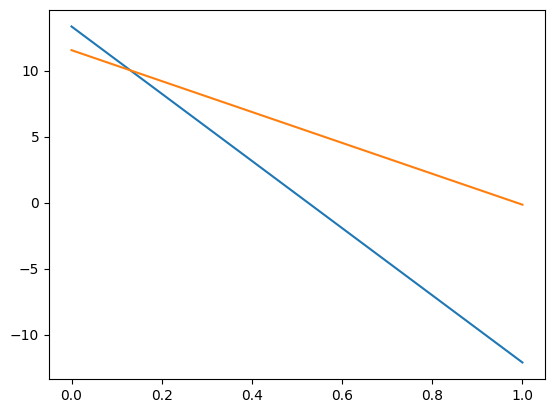

In [1884]:
plt.plot(velocities)

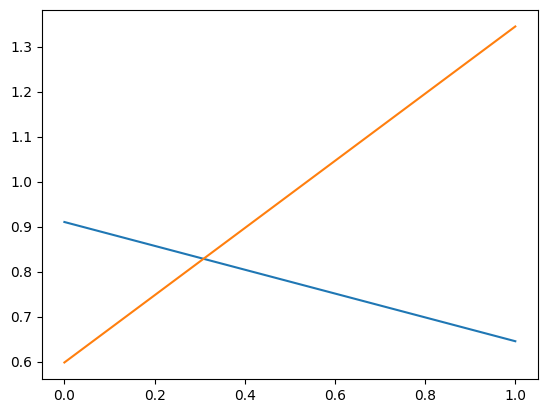

In [1885]:
plt.plot(positions)

In [2083]:
def compute_radial_distribution(positions, size, N_atoms, num_bins):
    """Compute the radial distribution function (g(r)) for a given set of coordinates."""
    rdf = np.zeros(num_bins)
    bin_width = size / (2 * num_bins)
    positions = np.random.rand(N_atoms, size)
    for i in range(N_atoms - 1):
        for j in range(i + 1, N_atoms):
            dx = positions[i, 0] - positions[j, 0]
            dy = positions[i, 1] - positions[j, 1]

            # Apply periodic boundary conditions
            dx -= size * np.round(dx / size)
            dy -= size * np.round(dy / size)

            r = np.sqrt(dx ** 2 + dy ** 2)
            
            # Assign particles to bins and increment the respective bin count
            bin_index = int(r / bin_width)
            if bin_index < num_bins:
                rdf[bin_index] += 2  # Increase count for pair (i, j)
    
    # Normalize the radial distribution function
    particle_density = N_atoms / (size ** 3)
    shell_volume = (4 / 3) * np.pi * (bin_width ** 3) * np.arange(1, num_bins + 1) ** 3
    normalization = 4 * np.pi * particle_density * shell_volume
    rdf /= normalization
    
    return rdf

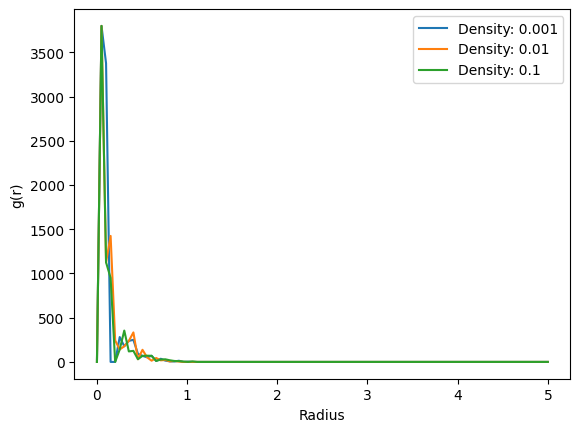

In [2098]:
# Simulation parameters
N_atoms = 10
densities = [0.001, 0.01, 0.1]  # Varying densities
num_bins = 100
size = 10

# Perform simulations for different densities
for density in densities:
    rdf = compute_radial_distribution(positions, size, N_atoms, num_bins)
    
    r = np.linspace(0, size / 2, num_bins)
    
    # Plot g(r)
    plt.plot(r, rdf, label=f'Density: {density}')
    
plt.xlabel('Radius')
plt.ylabel('g(r)')
plt.legend()
plt.show()